In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Position_Salaries.csv')

In [3]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
X=df.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
Y=df.iloc[:,-1].values

In [13]:
Y=Y.reshape(len(Y),1)
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [15]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
st_y=StandardScaler()
X=st_x.fit_transform(X)
Y=st_y.fit_transform(Y)

In [16]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [17]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [19]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [50]:
st_y.inverse_transform(reg.predict(st_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

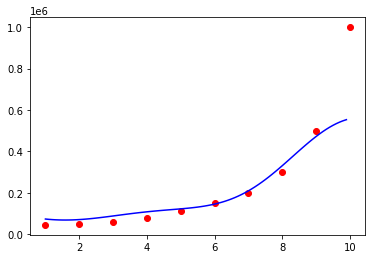

In [47]:
X_grid=np.arange(min(st_x.inverse_transform(X)),max(st_x.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(st_x.inverse_transform(X),st_y.inverse_transform(Y),color='red')
plt.plot(X_grid,st_y.inverse_transform(reg.predict(st_x.transform(X_grid)).reshape(-1,1)),color='blue')
#plt.plot(X_train,reg.predict(X_train))

In [49]:
print(reg.intercept_)

[0.01158103]
